In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import seaborn as sns

In [12]:
df_transactions_wofirstname = pd.read_csv("C:/Users/felix.oechslein/Desktop/Daten, 13.12.22/Rohdaten/" +
                                    "NRN_transactions_ohne_vorname.csv")

df_history_wofirstname = pd.read_csv("C:/Users/felix.oechslein/Desktop/Daten, 13.12.22/Rohdaten/" +
                                    "NRN_history_ohne_vorname.csv")

# Herausfiltern aller iids die Privatkunden sind und im Jahr x ihre erste Bestellung tätigten

In [3]:
df_transactions_wofirstname

,mandator,id,iid,attrtype,key,itemkey,status,productid,productname,modifiedprovider,createdprovider,startdate,quantity,discountname,saleschannelname,price,discountgroup,discountamount,pricetotal
0,2065871660,2492011118,2492007331,TI,74637,1.0,cancelled,799C1539-87D9-432F-8F97-721CB51E24FC,Altstadtrundgang,20211025080039,20211020150309,2.021103e+13,1.0,NaN,Standard,NaN,NaN,NaN,130.0
1,2065871660,2503022751,2503017947,OR,75643,NaN,NaN,NaN,NaN,20220131110115,20220131110115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2065871660,2503022735,2395321021,BK,75642,NaN,cancelled,NaN,NaN,20220228103456,20220131102802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2065871660,2492308295,2492305503,TI,74697,1.0,NaN,AE73CBD1-1721-4943-A815-D0C676578997,Stadtplan,20211025044813,20211025044813,NaN,1.0,NaN,Internet,NaN,NaN,NaN,0.0
4,2065871660,2481215839,2346714767,TI,72035,1.0,cancelled,799C1539-87D9-432F-8F97-721CB51E24FC,Altstadtrundgang,20210804131727,20210715124811,2.021101e+13,1.0,NaN,Standard,NaN,NaN,NaN,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33210,2065871660,2471342099,2400874733,TI,67631,1.0,NaN,799C1539-87D9-432F-8F97-721CB51E24FC,Altstadtrundgang,20201014102938,20200304121323,2.020101e+13,1.0,NaN,Standard,NaN,NaN,NaN,110.0
33211,2065871660,2473798736,2473795434,OR,71195,NaN,NaN,NaN,NaN,20210522143201,20210522143201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33212,2065871660,2474940929,2474934260,BK,71272,NaN,NaN,NaN,NaN,20210923164330,20210531155016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33213,2065871660,2471365269,2462826191,TI,71026,5.0,NaN,4A35833B-4BFC-41C4-ADCB-03B1A354BF5C,Kinderstadtplan,20210426090104,20210426090104,2.021072e+13,1.0,NaN,Pauschalen Online,NaN,NaN,NaN,0.0


In [4]:
df_transactions_wofirstname.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33215 entries, 0 to 33214
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mandator          33215 non-null  int64  
 1   id                33215 non-null  int64  
 2   iid               33215 non-null  int64  
 3   attrtype          33215 non-null  object 
 4   key               33215 non-null  int64  
 5   itemkey           22260 non-null  float64
 6   status            3282 non-null   object 
 7   productid         22259 non-null  object 
 8   productname       22260 non-null  object 
 9   modifiedprovider  33215 non-null  int64  
 10  createdprovider   33215 non-null  int64  
 11  startdate         10817 non-null  float64
 12  quantity          22260 non-null  float64
 13  discountname      0 non-null      float64
 14  saleschannelname  22260 non-null  object 
 15  price             0 non-null      float64
 16  discountgroup     0 non-null      float6

In [5]:
df_transactions_wofirstname["productname"].value_counts()

Altstadtrundgang                                  3979
Stadtplan                                         1848
Kombi-Streifzug (eigener Bus notwendig)           1832
Sehen & Erleben                                   1509
Doppelzimmer, Standard                            1006
                                                  ... 
Familienzimmer                                       1
Superior Doppelzimmer mit Zustellbett                1
Package Tierisch viel Spaß - 2 Erw. & 2 Kinder       1
Superior Einzelzimmer zur Doppelbelegung             1
Busparkplätze (englisch)                             1
Name: productname, Length: 322, dtype: int64

In [6]:
df_transactions_wofirstname.head(50)

,mandator,id,iid,attrtype,key,itemkey,status,productid,productname,modifiedprovider,createdprovider,startdate,quantity,discountname,saleschannelname,price,discountgroup,discountamount,pricetotal
0,2065871660,2492011118,2492007331,TI,74637,1.0,cancelled,799C1539-87D9-432F-8F97-721CB51E24FC,Altstadtrundgang,20211025080039,20211020150309,2.021103e+13,1.0,NaN,Standard,NaN,NaN,NaN,130.0
1,2065871660,2503022751,2503017947,OR,75643,NaN,NaN,NaN,NaN,20220131110115,20220131110115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2065871660,2503022735,2395321021,BK,75642,NaN,cancelled,NaN,NaN,20220228103456,20220131102802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2065871660,2492308295,2492305503,TI,74697,1.0,NaN,AE73CBD1-1721-4943-A815-D0C676578997,Stadtplan,20211025044813,20211025044813,NaN,1.0,NaN,Internet,NaN,NaN,NaN,0.0
4,2065871660,2481215839,2346714767,TI,72035,1.0,cancelled,799C1539-87D9-432F-8F97-721CB51E24FC,Altstadtrundgang,20210804131727,20210715124811,2.021101e+13,1.0,NaN,Standard,NaN,NaN,NaN,110.0
5,2065871660,2503220004,2503215787,OR,75656,NaN,NaN,NaN,NaN,20220201002920,20220201002920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2065871660,2492103633,2492100342,TI,74647,1.0,NaN,690F600A-8D26-473C-BA80-E405786D522F,Die Führung zum Lebkuchen,20211025104023,20211021102712,2.021112e+13,1.0,NaN,Standard,NaN,NaN,NaN,160.0
7,2065871660,2492308303,2492305503,TI,74697,2.0,NaN,3BD95B9C-40E6-4218-A768-6C7426244D87,für Einzelreisende - Aufenthalt,20211025044813,20211025044813,NaN,1.0,NaN,Internet,NaN,NaN,NaN,0.0
8,2065871660,2492308460,2492305415,TI,74711,1.0,cancelled,799C1539-87D9-432F-8F97-721CB51E24FC,Altstadtrundgang,20211119114048,20211025114555,2.021120e+13,1.0,NaN,Standard,NaN,NaN,NaN,110.0
9,2065871660,2492308305,2492305503,TI,74697,3.0,NaN,E7532EF8-DA19-4004-83D7-DA22427F15C7,Sehen & Erleben,20211025044813,20211025044813,NaN,1.0,NaN,Internet,NaN,NaN,NaN,0.0


<AxesSubplot:>

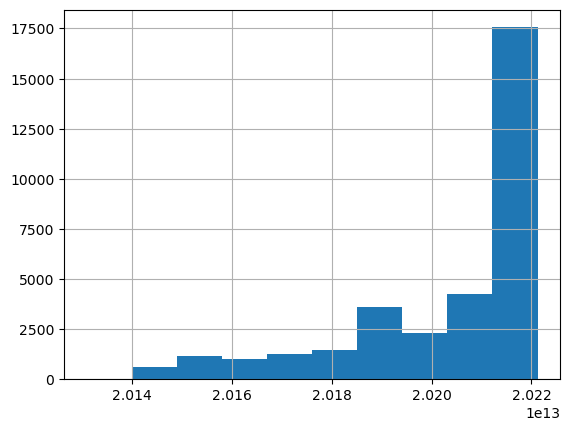

In [7]:
df_transactions_wofirstname["createdprovider"].hist()

In [8]:
df_transactions_wofirstname["iid"].nunique()

7167

In [9]:
df_history_wofirstname

,mandator,id,iid,attrtype,akey,text,creation
0,2065871660,2415149001,2415114127,NC,2334046735,|msg=/crm/service/acv|campaign.name=Anmeldebes...,20200620101123
1,2065871660,2384100265,2380174656,HY,2383883850,|msg=Newsletter - Endkunden - Kulinarik - Okto...,20191010113152
2,2065871660,2384116683,2380174656,NO,2383883850,|msg=Newsletter - Endkunden - Kulinarik - Okto...,20191010135130
3,2065871660,2387503063,2380174656,HY,2386878564,|msg=Newsletter - Endkunden - November19|subje...,20191118180117
4,2065871660,2387529309,2380174656,NO,2386878564,|msg=Newsletter - Endkunden - November19|userA...,20191119103503
...,...,...,...,...,...,...,...
256690,2065871660,2364844835,2121498645,NC,2363282043,|msg=/crm/service/usy|userAgent=Firefox 66.0 (...,20190520100007
256691,2065871660,2364844552,2121498645,HY,2363282043,|msg=Newsletter - Presse - Kinder - Mai 2019|s...,20190520095738
256692,2065871660,2364844839,2121498645,NO,2065871828,|msg=unsubscribe_completely|userAgent=Firefox ...,20190520100008
256693,2065871660,2364844945,2121498645,NO,2363282043,|msg=Newsletter - Presse - Kinder - Mai 2019|u...,20190520100002


<AxesSubplot:>

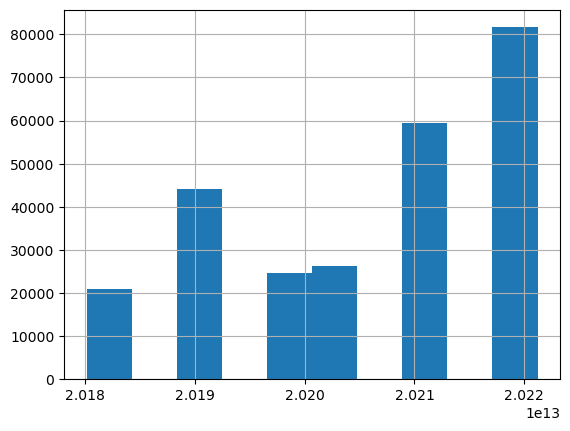

In [10]:
df_history_wofirstname["creation"].hist()

In [11]:
df_t_bereinigt = df_transactions_wofirstname[["iid", "key", "attrtype", "status", "pricetotal", "createdprovider"]]
df_t_bereinigt["pricetotal"] = pd.to_numeric(df_t_bereinigt["pricetotal"], errors = "coerce")
df_t_bereinigt = df_t_bereinigt.query('attrtype == "TI"')
df_t_bereinigt = df_t_bereinigt.query('status == "Buchung" or status == "Order"')
df_t_bereinigt = df_t_bereinigt.query('pricetotal >= 0.01')
searchfor = ['TEST']
#searchfor = ['TEST', 'JET', "WS"]
df_t_bereinigt = df_t_bereinigt[~df_t_bereinigt["key"].str.contains('|'.join(searchfor))]
df_t_bereinigt.head()

C:\Users\felix.oechslein\AppData\Local\Temp\ipykernel_22908\687719975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t_bereinigt["pricetotal"] = pd.to_numeric(df_t_bereinigt["pricetotal"], errors = "coerce")


AttributeError: Can only use .str accessor with string values!